**Importing the Dependencies**

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [162]:
titanic= pd.read_csv('/content/Titanic-Dataset.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
titanic.shape

(891, 12)

In [164]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Survived', ylabel='count'>

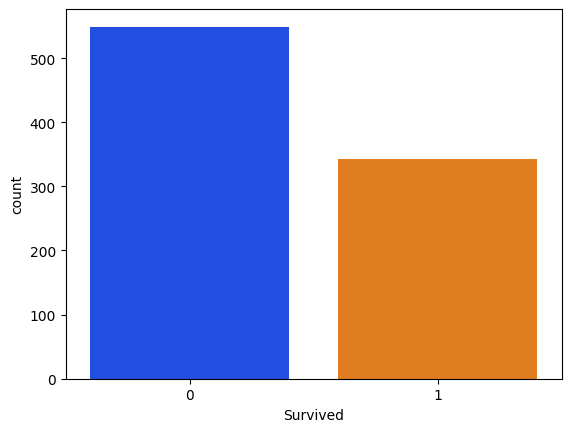

In [165]:
sns.countplot(x='Survived', data= titanic, palette='bright')

<b>Graph Inference:</b>

* We found that more than 500 people died
* We found that almost or little bit greater than 300 people survived






<Axes: xlabel='Survived', ylabel='count'>

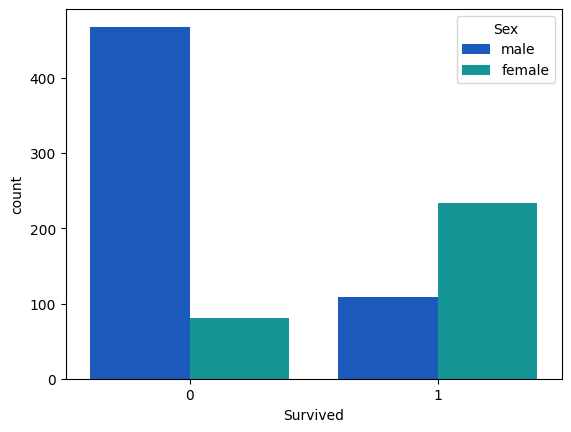

In [166]:
sns.countplot(x='Survived', hue='Sex', data= titanic, palette='winter')

<b>Graph Inference:</b>


* Here we find that the number of male died was far more than compared to female
* The female survuved was almost twice than that of male



<Axes: xlabel='Survived', ylabel='count'>

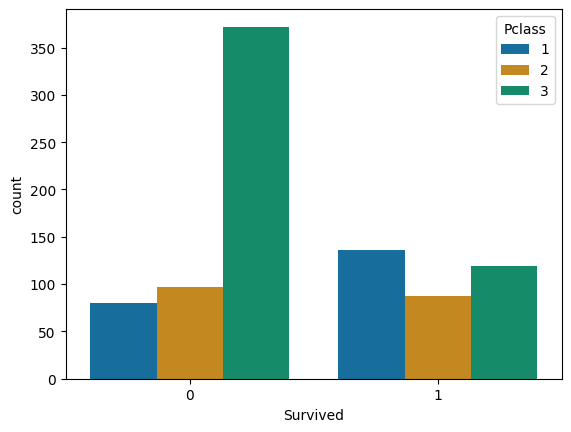

In [167]:
sns.countplot(x='Survived', hue='Pclass', data= titanic, palette='colorblind')

**Graph Inference:**

* The number of 1st class people died was very less when compared to 2nd and 3rd. 3rd class people suffered a subsequent deaths
* 1st class people survived more when compared to the other two classes



<Axes: xlabel='Age', ylabel='Count'>

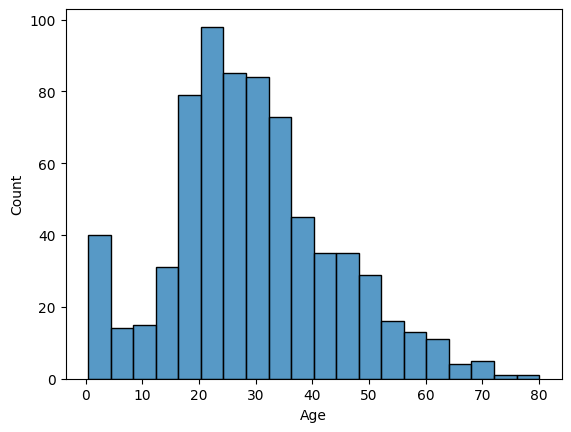

In [168]:
sns.histplot(titanic['Age'])

**Graph Inference:**


* The highest age group to travel was between 20-35 years
* The age group of above 70 years was very less



<Axes: ylabel='Frequency'>

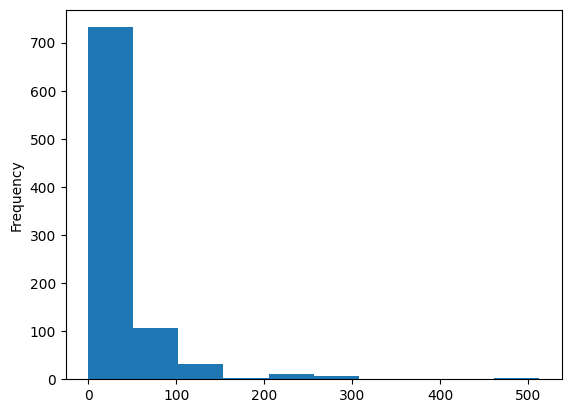

In [169]:
titanic['Fare'].plot.hist()

**Graph Inference:**


* The maximum number of tickets bought was under fare of 100
* Fare of above 100-200 seen is very less



<Axes: xlabel='SibSp', ylabel='count'>

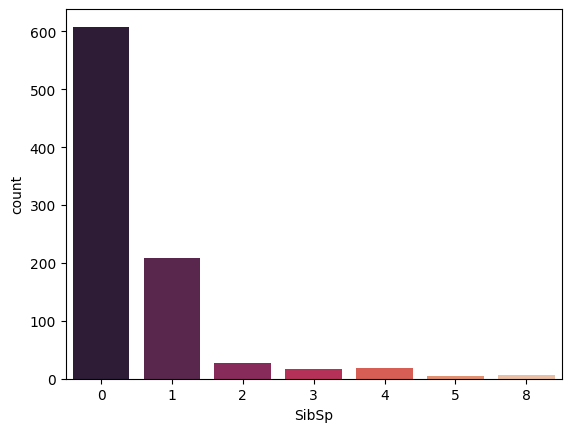

In [170]:
sns.countplot(x='SibSp', data= titanic, palette='rocket')

**Graph Inference:**


* There were very few number of people who were travelling with there siblings/spouse



<Axes: xlabel='Embarked', ylabel='count'>

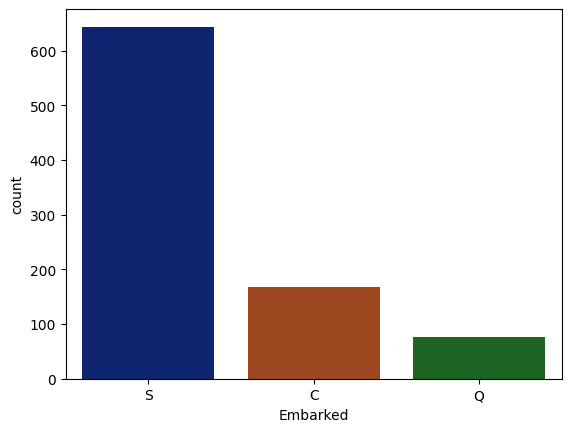

In [171]:
sns.countplot(x='Embarked', data= titanic, palette='dark')


**Graph Inference:**


* S -> Southhampton Q -> Queenstown C -> Cherbourg
* The most of the people travelling were from Southhampton port and the least from Queenstown



In [172]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [174]:
correlation= titanic.corr()

<ipython-input-174-8a91b5dec8dc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation= titanic.corr()


<Axes: >

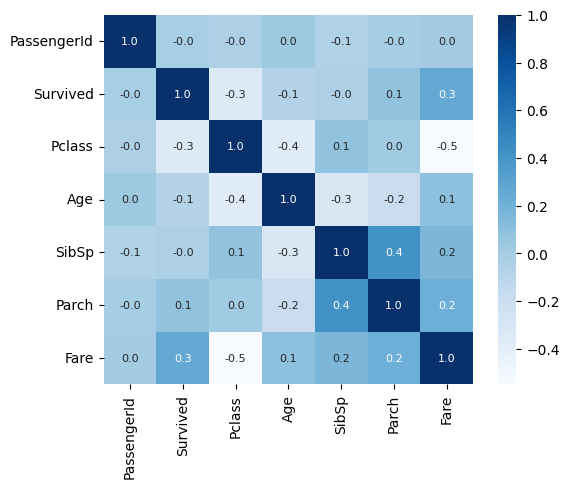

In [175]:
sns.heatmap(correlation, cbar= True, cmap='Blues', square=True, fmt='.1f', annot=True, annot_kws= {'size':8})

This is the heatmap for the following dataset and showing correlation between various features

<Axes: xlabel='Pclass', ylabel='Age'>

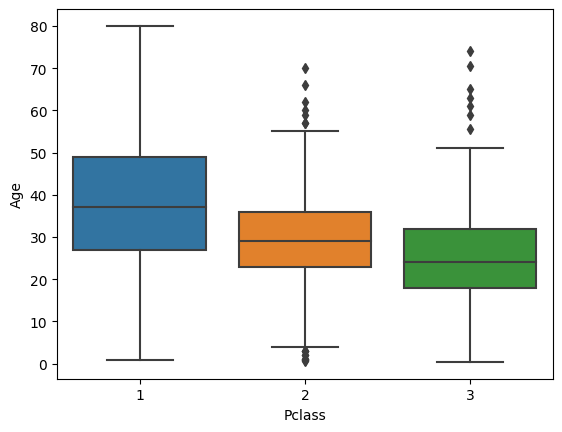

In [176]:
sns.boxplot(x='Pclass', y='Age', data= titanic)

**Graph Inference:**


* We found that the older age group is travelling more in 1 and 2 class
* There are more outliers in class 2 and 3



In [177]:
titanic.drop(['Cabin', 'Name', 'PassengerId', 'Ticket','Parch', 'SibSp'], axis=1, inplace= True)

In [178]:
titanic.head() #dropped the unecessary columns

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [179]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [180]:
titanic.dropna(inplace=True)

In [181]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

**One Hot Encoding**

In [182]:
dummies= pd.get_dummies(titanic[['Sex', 'Embarked']])


In [183]:
dummies.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [184]:
titanic= pd.concat([titanic,dummies],axis=1)

In [185]:
titanic.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,7.2500,S,0,1,0,0,1
1,1,1,female,38.0,71.2833,C,1,0,1,0,0
2,1,3,female,26.0,7.9250,S,1,0,0,0,1


In [186]:
titanic.drop(['Sex', 'Embarked','Sex_female','Embarked_C'], axis=1, inplace= True) #dropping the unnecessary columns

In [187]:
titanic.head(3)

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,0,1
1,1,1,38.0,71.2833,0,0,0
2,1,3,26.0,7.9250,0,0,1


In [188]:
titanic.dtypes

Survived        int64
Pclass          int64
Age           float64
Fare          float64
Sex_male        uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

**Training the Model**

In [189]:
X= titanic.drop('Survived',axis=1)
Y= titanic['Survived']

In [190]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size= 0.33, random_state=4)

In [191]:
model= LogisticRegression()

In [192]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [193]:
prediction= model.predict(X_test)

In [194]:
classification_report(Y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.81      0.83      0.82       145\n           1       0.72      0.68      0.70        90\n\n    accuracy                           0.77       235\n   macro avg       0.76      0.76      0.76       235\nweighted avg       0.77      0.77      0.77       235\n'

In [195]:
confusion_matrix(Y_test, prediction)

array([[121,  24],
       [ 29,  61]])

In [196]:
accuracy_score(Y_test, prediction)*100

77.4468085106383

<c>**END**</c>